In [21]:
#23/8/24 Analyses Chemopy Results

import pandas as pd
import numpy as np

In [17]:
#Read NN results
#this is in a text file as the model creator cannot keep variables to maintain memory limits

with open('/Users/james/Documents/Honours/Results/Figure_Development/Chemopy/resultsdata/ChemopyNN_out.txt', 'r') as file:
    text = file.read()
    
import re

pattern = re.compile(r'\bmcc = .+$', re.MULTILINE)
lines = pattern.findall(text)

# Print or process the matching lines
results = []
for line in lines:
    results.append(float(line[6:]))

In [18]:
results

[0.3530829547225743,
 0.0,
 0.45723402834709337,
 0.0,
 0.41065324603889813,
 0.48970461459793163,
 0.5395818099391085,
 0.44964026275209085,
 0.5705763292358926,
 0.2508986187070821,
 0.3016933268392621,
 0.423273435266739,
 0.44529050658343367,
 0.5834518571189314,
 0.6451404641413351,
 0.40957102903597453,
 0.47104793887064794,
 0.0,
 0.5033281126575019,
 0.3311296376339095,
 0.6178421847192422,
 0.5471792375496609]

In [23]:
import os
datasets = []
index = []
directory = '/Users/james/Documents/Honours/Results/Figure_Development/Chemopy/resultsdata/'
namelist = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        datasets.append(df)
        namelist.append(filename)

In [29]:
namelist

['chemopy_svm.csv', 'chemopy_rf.csv', 'chemopy_knn.csv']

In [45]:
index = ['SVM', 'RF', 'KNN', 'NN']

In [40]:
mcclist = []
for data in datasets:
    mcclist.append(data['MCC'].values.tolist())
mcclist.append(results)

In [65]:
datalist = datasets[0]['Dataset'].values
temp = []
for item in datalist:
    temp.append(item[:-4])
datalist = temp

In [44]:
for item in mcclist:
    print(len(item))

22
22
22
22


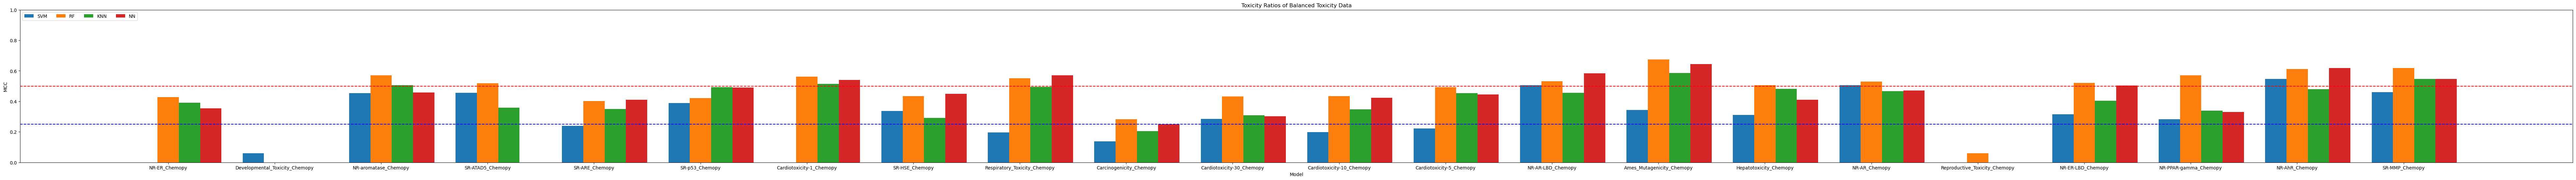

In [132]:
import matplotlib.pyplot as plt
data = mcclist

models = ('Sample Count', 'Positive Samples', 'Negative Samples')
x = np.arange(len(datalist))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(figsize=(100, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Toxicity Ratios of Balanced Toxicity Data')
ax.set_xticks(x + width, datalist)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()

In [72]:
import statistics
meanvals = []
loops = 0
for val in mcclist[0]:
    currdata = []
    for item in mcclist:
        currdata.append(item[loops])
    
    mean = statistics.mean(currdata)
    meanvals.append(mean)
    loops +=1

In [77]:
loops = 0
for val in meanvals:
    print(datalist[loops], ':', val)
    
    loops += 1

NR-ER_Chemopy : 0.2931239397995312
Developmental_Toxicity_Chemopy : -0.026935275391946928
NR-aromatase_Chemopy : 0.49661035509679347
SR-ATAD5_Chemopy : 0.3337229076616818
SR-ARE_Chemopy : 0.3500205439747175
SR-p53_Chemopy : 0.447916625990617
Cardiotoxicity-1_Chemopy : 0.40439103412125266
SR-HSE_Chemopy : 0.37820951998998176
Respiratory_Toxicity_Chemopy : 0.4530110206768031
Carcinogenicity_Chemopy : 0.21941439229130807
Cardiotoxicity-30_Chemopy : 0.33173239556822653
Cardiotoxicity-10_Chemopy : 0.3503650892980398
Cardiotoxicity-5_Chemopy : 0.40291608951605395
NR-AR-LBD_Chemopy : 0.5189587704418968
Ames_Mutagenicity_Chemopy : 0.5618732509668121
Hepatotoxicity_Chemopy : 0.4269489117993397
NR-AR_Chemopy : 0.4934489123692104
Reproductive_Toxicity_Chemopy : 0.0149403576166799
NR-ER-LBD_Chemopy : 0.43563482951150934
NR-PPAR-gamma_Chemopy : 0.38085866578231065
NR-AhR_Chemopy : 0.5643251975998923
SR-MMP_Chemopy : 0.5432751327055987


In [76]:
datalist

['NR-ER_Chemopy',
 'Developmental_Toxicity_Chemopy',
 'NR-aromatase_Chemopy',
 'SR-ATAD5_Chemopy',
 'SR-ARE_Chemopy',
 'SR-p53_Chemopy',
 'Cardiotoxicity-1_Chemopy',
 'SR-HSE_Chemopy',
 'Respiratory_Toxicity_Chemopy',
 'Carcinogenicity_Chemopy',
 'Cardiotoxicity-30_Chemopy',
 'Cardiotoxicity-10_Chemopy',
 'Cardiotoxicity-5_Chemopy',
 'NR-AR-LBD_Chemopy',
 'Ames_Mutagenicity_Chemopy',
 'Hepatotoxicity_Chemopy',
 'NR-AR_Chemopy',
 'Reproductive_Toxicity_Chemopy',
 'NR-ER-LBD_Chemopy',
 'NR-PPAR-gamma_Chemopy',
 'NR-AhR_Chemopy',
 'SR-MMP_Chemopy']

In [85]:
len(datalist )

22

In [109]:
endoindex = [0, 2, 3, 4, 5, 7, 13, 16, 18, 19, 20, 21]
cardioindex = [6, 12, 11, 10]
devrepindex = [1, 17]
mutacarcheparespindex = [14, 9, 15, 8]

In [100]:
endovals = [[], [], [], []]
endonames = []
for val in endoindex:
    endovals[0].append(mcclist[0][val])
    endovals[1].append(mcclist[1][val])
    endovals[2].append(mcclist[2][val])
    endovals[3].append(mcclist[3][val])
    endonames.append(datalist[val])

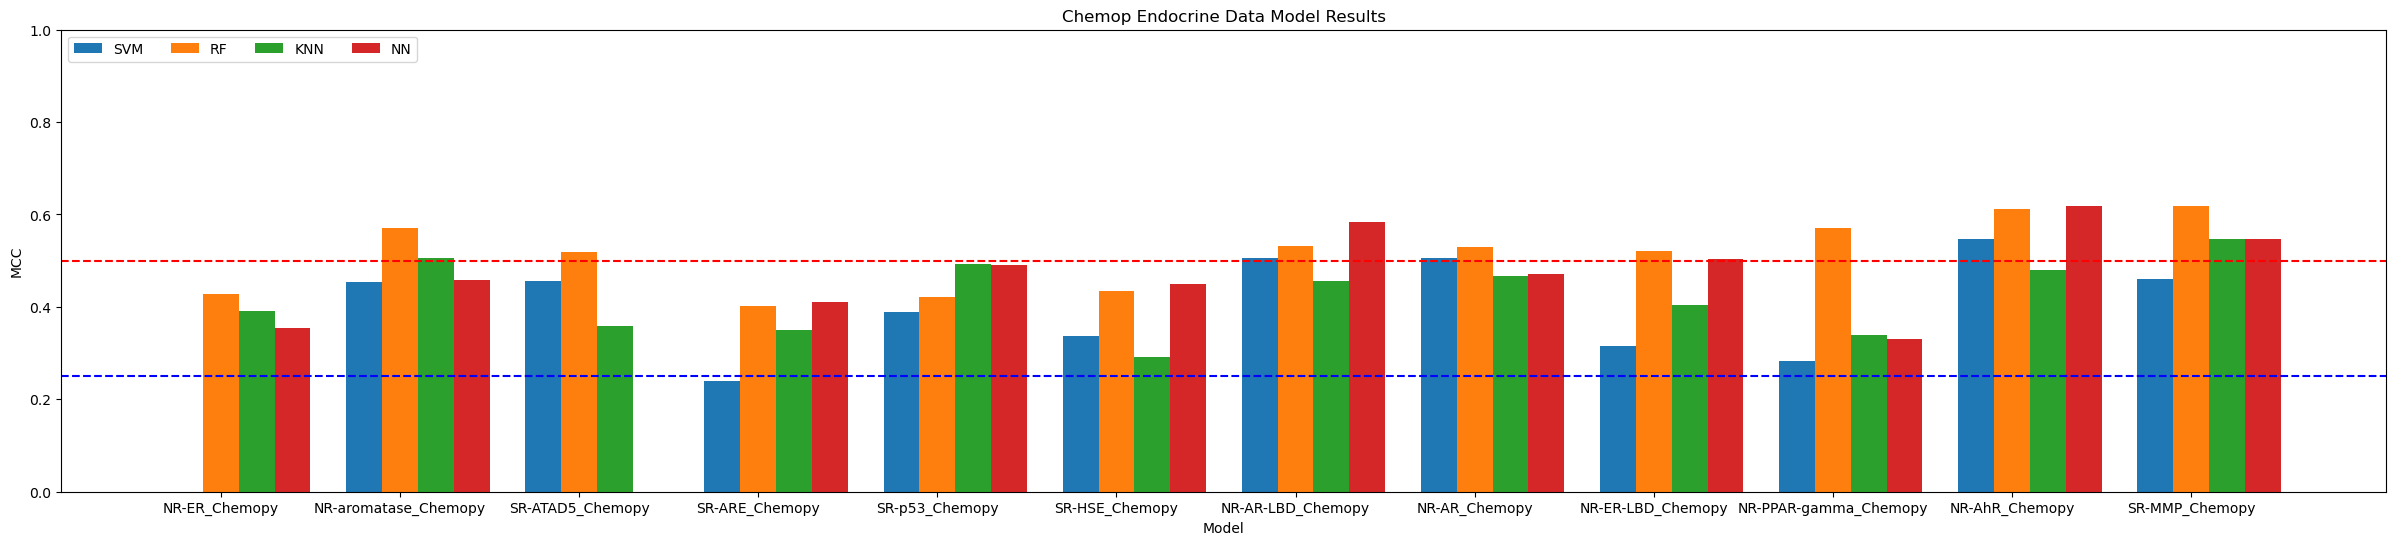

In [115]:
import matplotlib.pyplot as plt
data = endovals

x = np.arange(len(endoindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(30, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Chemop Endocrine Data Model Results')
ax.set_xticks(x + width, endonames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()

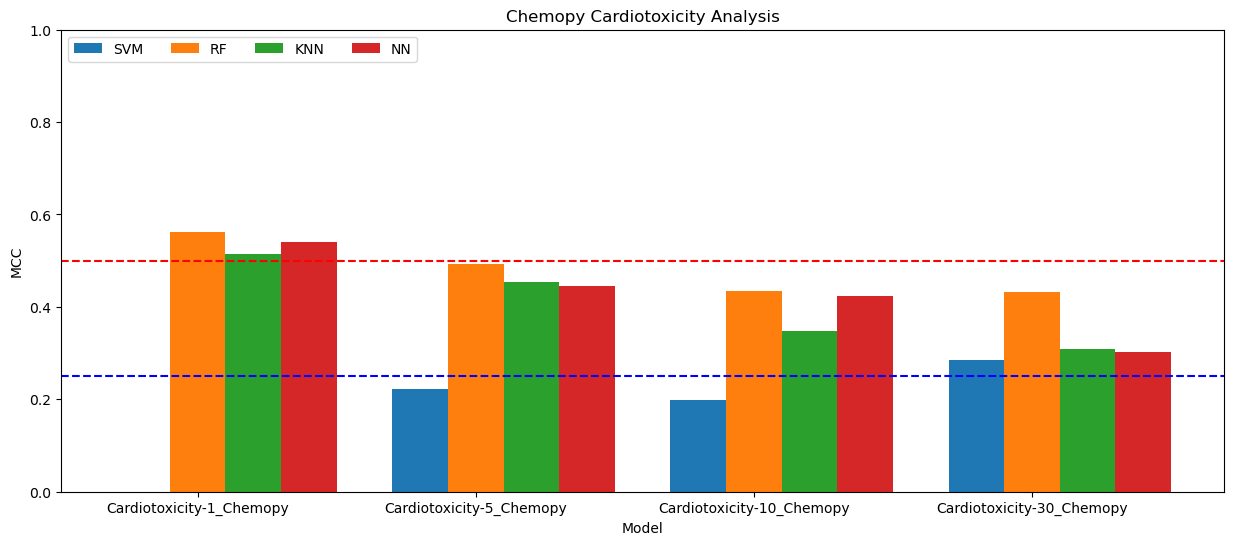

In [116]:
cardiovals = [[], [], [], []]
cardionames = []
for val in cardioindex:
    cardiovals[0].append(mcclist[0][val])
    cardiovals[1].append(mcclist[1][val])
    cardiovals[2].append(mcclist[2][val])
    cardiovals[3].append(mcclist[3][val])
    cardionames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = cardiovals

x = np.arange(len(cardioindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Chemopy Cardiotoxicity Analysis')
ax.set_xticks(x + width, cardionames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()

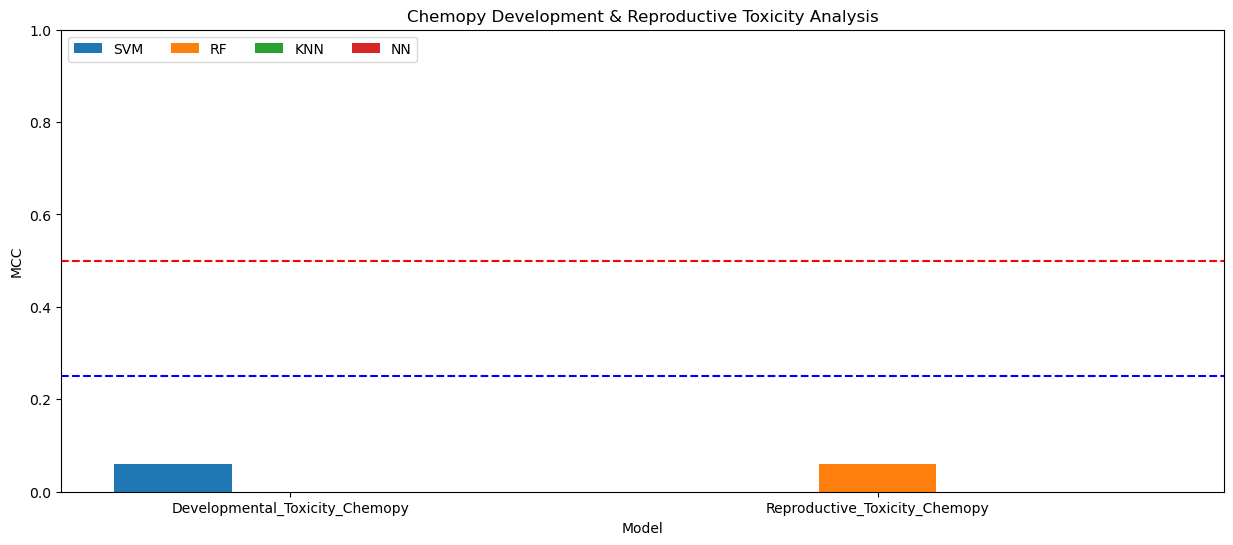

In [117]:
devrepvals = [[], [], [], []]
devrepnames = []
for val in devrepindex:
    devrepvals[0].append(mcclist[0][val])
    devrepvals[1].append(mcclist[1][val])
    devrepvals[2].append(mcclist[2][val])
    devrepvals[3].append(mcclist[3][val])
    devrepnames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = devrepvals

x = np.arange(len(devrepindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Chemopy Development & Reproductive Toxicity Analysis')
ax.set_xticks(x + width, devrepnames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')


plt.show()

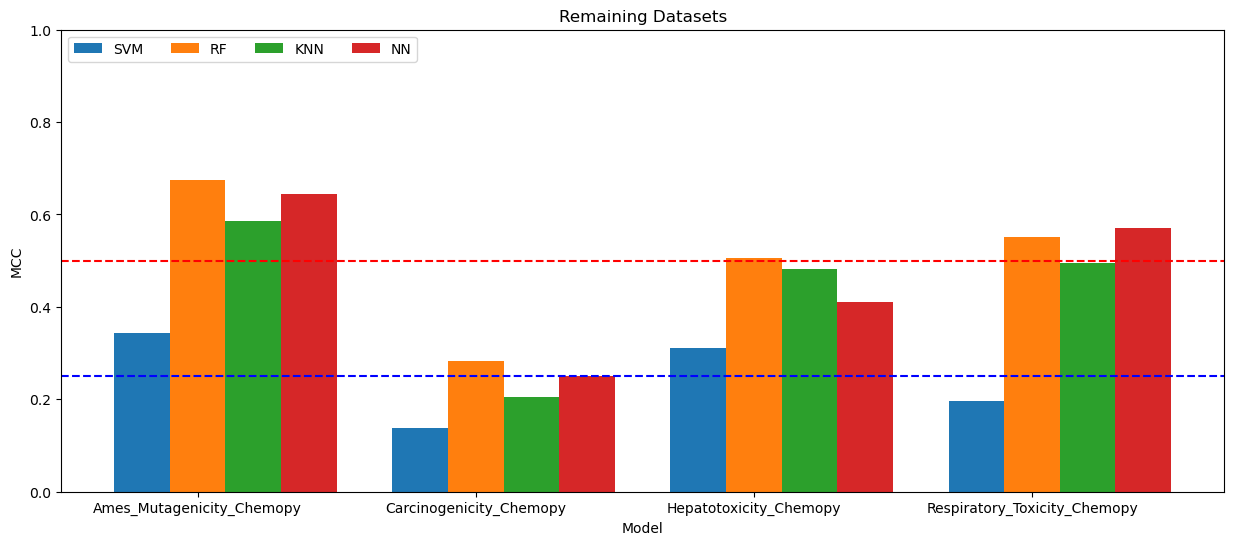

In [118]:
mutacarcheparespvals = [[], [], [], []]
mutacarcheparespnames = []
for val in mutacarcheparespindex:
    mutacarcheparespvals[0].append(mcclist[0][val])
    mutacarcheparespvals[1].append(mcclist[1][val])
    mutacarcheparespvals[2].append(mcclist[2][val])
    mutacarcheparespvals[3].append(mcclist[3][val])
    mutacarcheparespnames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = mutacarcheparespvals

x = np.arange(len(mutacarcheparespindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Remaining Datasets')
ax.set_xticks(x + width, mutacarcheparespnames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()

In [128]:
seed = 81
#Data import
rawdata = []
directory = '/Users/james/Documents/Honours/Data/ProcessedRaws/'
names = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        rawdata.append(df)
        names.append(filename[:-4])

In [121]:
samplecount = []
for item in rawdata:
    samplecount.append(len(item['Toxicity_Value'].values))

In [131]:
loops = 0
for item in names:
    print(item, ':', samplecount[loops])
    loops += 1

Cardiotoxicity-30 : 1547
NR-AR-LBD : 6629
Hepatotoxicity : 2889
SR-ARE : 5712
Respiratory_Toxicity : 1348
NR-AhR : 6410
SR-p53 : 6636
Reproductive_Toxicity : 156
NR-ER : 6068
SR-HSE : 6338
SR-MMP : 5700
SR-ATAD5 : 6931
NR-PPAR-gamma : 6322
Carcinogenicity : 1021
NR-ER-LBD : 6820
Cardiotoxicity-10 : 1547
Cardiotoxicity-5 : 1547
NR-aromatase : 5707
Developmental_Toxicity : 218
Ames_Mutagenicity : 7485
NR-AR : 7118
Cardiotoxicity-1 : 1547
